In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import os 

style.use('ggplot')

In [2]:
dirname = os.getcwd()
dirname = dirname + '/Data/'

In [3]:
arwu = pd.read_csv(dirname + 'ARWU/ARWURanking_2018_grid.csv')
the = pd.read_csv(dirname + 'THE/THERanking2019__grid.csv')
qs = pd.read_csv(dirname + 'QS/qs2019_grid.csv')

arwu = arwu.head(100)
the = the.head(100)
qs = qs.head(100)

arwu = arwu[['GRID_ID', 'WorldRank']]
the = the[['GRID_ID', 'rank']]
qs = qs[['GRID_ID', 'Rank']]

In [4]:
df = pd.merge(arwu, the, on="GRID_ID", how="inner")
df = pd.merge(df, qs, on='GRID_ID', how="inner")
df['WorldRank'] = df['WorldRank'].astype(int)
df['rank'] = df['rank'].str.replace('=', '').astype(int)
df['Rank'] = df['Rank'].str.replace('=', '').astype(int)

/Users/Friso/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


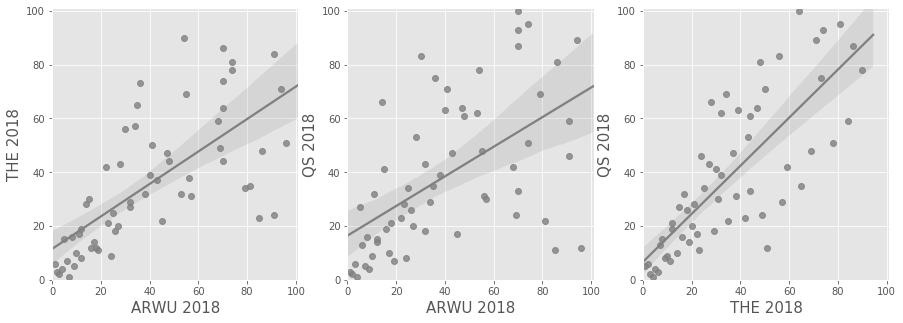

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2 ,ax3) = plt.subplots(1, 3, figsize=(15,5))

sns.regplot(x=df['WorldRank'], y=df['rank'], ax=ax1, color="grey")
# ax1.set_title('Scatter plot')
ax1.set_xlabel('ARWU 2018', fontsize=15)
ax1.set_ylabel('THE 2018', fontsize=15)
ax1.set_xlim((0,101))
ax1.set_ylim((0,101))

sns.regplot(df['WorldRank'], df['Rank'], ax=ax2, color="grey")
# ax1.set_title('Scatter plot')
ax2.set_xlabel('ARWU 2018', fontsize=15)
ax2.set_ylabel('QS 2018', fontsize=15)
ax2.set_xlim((0,101))
ax2.set_ylim((0,101))

sns.regplot(df['rank'], df['Rank'], ax=ax3, color="grey")
# ax1.set_title('Scatter plot')
ax3.set_xlabel('THE 2018', fontsize=15)
ax3.set_ylabel('QS 2018', fontsize=15)
ax3.set_xlim((0,101))
ax3.set_ylim((0,101))

fig.show()

In [7]:
arwu2018 = pd.read_csv(dirname + 'ARWU/ARWURanking_2018_grid.csv').head(100)
arwu2017 = pd.read_csv(dirname + 'ARWU/ARWURanking_2017_grid.csv').head(100)
arwu2018 = arwu2018[['GRID_ID', 'WorldRank']]
arwu2017 = arwu2017[['GRID_ID', 'WorldRank']]

arwu2018['WorldRank'] = arwu2018['WorldRank'].astype(int)
arwu2018.rename(columns={'WorldRank': 'WorldRank2018'}, inplace=True)
arwu2017['WorldRank'] = arwu2017['WorldRank'].astype(int)

dfarwu = pd.merge(arwu2018, arwu2017, on='GRID_ID', how="inner")


the2019 = pd.read_csv(dirname + 'THE/THERanking2019__grid.csv').head(100)
the2018 = pd.read_csv(dirname + 'THE/THERanking2018__grid.csv').head(100)

the2019 = the2019[['GRID_ID', 'rank']]
the2018 = the2018[['GRID_ID', 'rank']]

the2019['rank'] = the2019['rank'].str.replace('=', '').astype(int)
the2018['rank'] = the2018['rank'].str.replace('=', '').astype(int)

the2019.rename(columns={'rank': 'rank2018'}, inplace=True)
dfthe = pd.merge(the2019, the2018, on='GRID_ID', how="inner")
dfthe


qs2019 = pd.read_csv(dirname + 'QS/qs2019_grid.csv').head(100)
qs2018 = pd.read_csv(dirname + 'QS/qs2018_grid.csv').head(100)

qs2019 = qs2019[['GRID_ID', 'Rank']]
qs2018 = qs2018[['GRID_ID', 'Rank']]
qs2019['Rank'] = qs2019['Rank'].str.replace('=', '').astype(int)
qs2018['Rank'] = qs2018['Rank'].str.replace('=', '').astype(int)

qs2019.rename(columns={'Rank': 'Rank2018'}, inplace=True)
dfqs = pd.merge(qs2019, qs2018, on='GRID_ID', how="inner")

(0, 101)

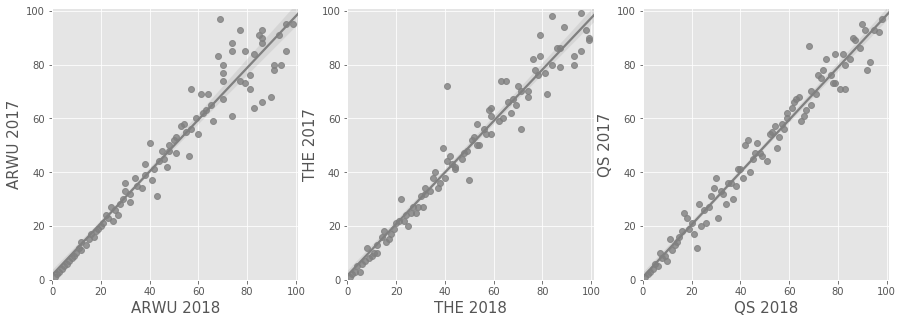

In [8]:
fig, (ax1, ax2 ,ax3) = plt.subplots(1, 3, figsize=(15,5))

sns.regplot(x=dfarwu['WorldRank2018'], y=dfarwu['WorldRank'], ax=ax1, color="grey")
# ax1.set_title('Scatter plot')
ax1.set_xlabel('ARWU 2018', fontsize=15)
ax1.set_ylabel('ARWU 2017', fontsize=15)
ax1.set_xlim((0,101))
ax1.set_ylim((0,101))

sns.regplot(x=dfthe['rank2018'], y=dfthe['rank'], ax=ax2, color="grey")
# ax1.set_title('Scatter plot')
ax2.set_xlabel('THE 2018', fontsize=15)
ax2.set_ylabel('THE 2017', fontsize=15)
ax2.set_xlim((0,101))
ax2.set_ylim((0,101))

sns.regplot(x=dfqs['Rank2018'], y=dfqs['Rank'], ax=ax3, color="grey")
# ax1.set_title('Scatter plot')
ax3.set_xlabel('QS 2018', fontsize=15)
ax3.set_ylabel('QS 2017', fontsize=15)
ax3.set_xlim((0,101))
ax3.set_ylim((0,101))